In [0]:
import pandas as pd
import numpy as np
from sklearn import datasets
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [0]:
data1 = pd.read_csv(r'sample1.csv',encoding = "ISO-8859-1")
data2 = pd.read_csv(r'sample2.csv',encoding = "ISO-8859-1")

C:\Users\muralima\AppData\Local\Continuum\anaconda3-\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (6,7,32,33,42,63,66,72,76,128,134,135) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\muralima\AppData\Local\Continuum\anaconda3-\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (6,7,20,32,33,63,91,125,126,127,128,130,133,136,139,145) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
data2 = data2.loc[data2['LOB'] == 'AL']

In [0]:
data1.head()

CLMNO OCCURRENCE  CLNTNO  NET_INDEMNITY_RESERVE  NET_EXPENSE_RESERVE  \
0  PHPB-7904A2  PHPB-7904    6902                      0                    0   
1  PHPB-7905A2  PHPB-7905    6902                      0                    0   
2  PHPB-7906A2  PHPB-7906    6902                      0                    0   
3  PHPB-7907A2  PHPB-7907    6902                      0                    0   
4  PHPB-8275A9  PHPB-8275    6902                      0                    0   

     CARRIERCLMNO CLIENTSCLMNO THIRDNUM        ADJUSTER  LOSSDATE    ...      \
0  646-226907 001          NaN      NaN  BARBARA LASTER  20160906    ...       
1  646-226913 001       157372      NaN  TRACY BUCHANAN  20160805    ...       
2  646-226914 001          NaN      NaN  BARBARA HUGHES  20160906    ...       
3  646-226915 001          NaN      NaN    PAUL MCGRATH  20160827    ...       
4  646-228497 001          NaN      NaN  BARBARA HUGHES  20160427    ...       

  AWM_Owner_Retained_Salvage_Amount                            AWM_Cause_Code  \
0                               NaN                           AL --IV BACKING   
1                               NaN  AL --Loading / unloading damage premises   
2                               NaN                           AL --IV BACKING   
3                               NaN                     GL --IMPROPER HOOK-UP   
4                               NaN                      AL --I/V STRUCK TREE   

   AWM_Ref._to_Carrier_for_Recovery  AWM_Salvage  \
0                               NaN          NaN   
1                               NaN          NaN   
2                               NaN          NaN   
3                               NaN          NaN   
4                               NaN          NaN   

  AWM_TF_Final_Mile_Branch_Code AWM_TF/Final_Mile_Contractor  \
0                           NaN                          NaN   
1                           NaN                          NaN   
2                           NaN                          NaN   
3                           NaN                          NaN   
4                           NaN                          NaN   

  AWM_UST_Branch_Code AWM_Van_Line AWM_Voluntary_Payment Deductible  
0                 NaN          NaN                   NaN     250000  
1                 NaN          NaN                   NaN     250000  
2                 NaN          NaN                   NaN     100000  
3                 NaN          NaN                   NaN     200000  
4                 NaN          NaN                   NaN     100000  

[5 rows x 147 columns]

In [0]:
data1.shape

(12417, 147)

In [0]:
data2.head()

CLMNO OCCURRENCE  CLNTNO  NET_INDEMNITY_RESERVE  NET_EXPENSE_RESERVE  \
0  ZUMS-3703A2  ZUMS-3703    3812                      0                    0   
1  ZUMS-3705A1  ZUMS-3705    3812                      0                    0   
2  ZUMS-3705A2  ZUMS-3705    3812                      0                    0   
3  ZUMS-3706A2  ZUMS-3706    3812                      0                    0   
4  ZUMS-3707A9  ZUMS-3707    3812                      0                    0   

  CARRIERCLMNO CLIENTSCLMNO THIRDNUM      ADJUSTER  LOSSDATE  \
0          NaN          NaN      NaN   LISSA YOUNG  20120611   
1          NaN          NaN      NaN  JANICE DUKES  20120615   
2          NaN          NaN      NaN  JANICE DUKES  20120615   
3          NaN          NaN      NaN   TERRI KANEY  20120613   
4          NaN          NaN      NaN   TERRI KANEY  20120611   

           ...          AWM_Order_Number  AWM_Owner_Retained_Salvage_Amount  \
0          ...                       NaN                                NaN   
1          ...                       NaN                                NaN   
2          ...                       NaN                                NaN   
3          ...                       NaN                                NaN   
4          ...                       NaN                                NaN   

   AWM_Cause_Code  AWM_Ref._to_Carrier_for_Recovery AWM_Salvage  \
0             NaN                               NaN         NaN   
1             NaN                               NaN         NaN   
2             NaN                               NaN         NaN   
3             NaN                               NaN         NaN   
4             NaN                               NaN         NaN   

  AWM_TF_Final_Mile_Branch_Code AWM_TF/Final_Mile_Contractor  \
0                           NaN                          NaN   
1                           NaN                          NaN   
2                           NaN                          NaN   
3                           NaN                          NaN   
4                           NaN                          NaN   

  AWM_UST_Branch_Code AWM_Van_Line AWM_Voluntary_Payment  
0                 NaN          NaN                   NaN  
1                 NaN          NaN                   NaN  
2                 NaN          NaN                   NaN  
3                 NaN          NaN                   NaN  
4                 NaN          NaN                   NaN  

[5 rows x 146 columns]

In [0]:
data2.shape

(28146, 146)

In [0]:
data2.isna().sum(axis=0)

CLMNO                                    0
OCCURRENCE                               0
CLNTNO                                   0
NET_INDEMNITY_RESERVE                    0
NET_EXPENSE_RESERVE                      0
CARRIERCLMNO                         12050
CLIENTSCLMNO                         26579
THIRDNUM                             27044
ADJUSTER                               135
LOSSDATE                                 0
STATUS                                   0
OPENDATE                                 0
CLOSEDATE                              749
REOPENDATE                           25714
LOB                                      0
COVERAGE                                 0
STATE                                    0
DESCR                                   15
DESCR2                               22530
INJURIES                             15014
CAUSE                                21339
ANATOMY                                  0
IPOLNO                                   0
IEFFDT     

In [0]:
data1.isna().sum(axis=0)

CLMNO                                    0
OCCURRENCE                               0
CLNTNO                                   0
NET_INDEMNITY_RESERVE                    0
NET_EXPENSE_RESERVE                      0
CARRIERCLMNO                           277
CLIENTSCLMNO                         12093
THIRDNUM                             12408
ADJUSTER                               970
LOSSDATE                                 0
STATUS                                   0
OPENDATE                                 0
CLOSEDATE                             1127
REOPENDATE                           11263
LOB                                      0
COVERAGE                                 0
STATE                                    0
DESCR                                    1
DESCR2                                7565
INJURIES                              3590
CAUSE                                12417
ANATOMY                                  0
IPOLNO                                   0
IEFFDT     

In [0]:
data1 = data1.dropna(thresh=data1.shape[0]*0.5,how='all',axis=1)

In [0]:
data1.isna().sum(axis=0)

CLMNO                       0
OCCURRENCE                  0
CLNTNO                      0
NET_INDEMNITY_RESERVE       0
NET_EXPENSE_RESERVE         0
CARRIERCLMNO              277
ADJUSTER                  970
LOSSDATE                    0
STATUS                      0
OPENDATE                    0
CLOSEDATE                1127
LOB                         0
COVERAGE                    0
STATE                       0
DESCR                       1
INJURIES                 3590
ANATOMY                     0
IPOLNO                      0
IEFFDT                      0
IEXPDT                      0
CLAIMANT                    0
CSSNUM                      0
CADDR1                   1243
CCITY                    1243
CSTATE                      0
CZIP                     1243
CPHONE                   5579
CGENDER                     0
LOCDESC                    78
LOC                         0
                         ... 
INAME                       0
IADDR1                    335
ICITY     

In [0]:
data2 = data2.dropna(thresh=data2.shape[0]*0.5,how='all',axis=1)

In [0]:
data2.columns

Index(['CLMNO', 'OCCURRENCE', 'CLNTNO', 'NET_INDEMNITY_RESERVE',
       'NET_EXPENSE_RESERVE', 'CARRIERCLMNO', 'ADJUSTER', 'LOSSDATE', 'STATUS',
       'OPENDATE', 'CLOSEDATE', 'LOB', 'COVERAGE', 'STATE', 'DESCR', 'ANATOMY',
       'IPOLNO', 'IEFFDT', 'IEXPDT', 'CLAIMANT', 'CSSNUM', 'CADDR1', 'CCITY',
       'CSTATE', 'CZIP', 'CPHONE', 'CGENDER', 'LOCDESC', 'LOC', 'LOCTXTCODE',
       'LOCNM', 'LOCNM2', 'LOCCITY', 'LOCSTATE', 'LOCZIP', 'DIVNUM', 'ISSNUM',
       'INAME', 'IADDR1', 'ICITY', 'ISTATE', 'IZIP', 'LSTATE', 'DTAXID',
       'DSTATE', 'VINNO', 'AUTOMAKE', 'VEHYEAR', 'DRIVERNAME', 'DRIVERAGE',
       'LICENSENO', 'LICSTATE', 'PLATE', 'PLATESTATE', 'EMPLSTATUS',
       'NCCI_NOI', 'NCCI_SOI', 'NCCI_SEV', 'WEEKLYWAGE', 'MARITAL',
       'INDRESERVES', 'MEDRESERVES', 'EXPRESERVES', 'TOTALRESERVES', 'INDPAID',
       'MEDPAID', 'EXPPAID', 'YORKPAID', 'TOTALPAID', 'RECOVERIES',
       'INCURRED'],
      dtype='object')

In [0]:
#Removing irrelevant columns
data2 = data2.drop(['CLMNO','OCCURRENCE','CLNTNO','LOCNM','LOCDESC','LOCNM2','LOCCITY','STATE','CADDR1','CCITY','CSTATE','INAME','IADDR1','ICITY','ISTATE','DRIVERNAME','CARRIERCLMNO','ADJUSTER','IPOLNO','IEFFDT','IEXPDT','LOC','LOCTXTCODE','VINNO','LICENSENO'],axis=1)

In [0]:
data2['STATUS'] = data2['STATUS'].astype('category')
data2['LOCSTATE'] = data2['LOCSTATE'].astype('category')
data2['CGENDER'] = data2['CGENDER'].astype('category')
data2['LSTATE'] = data2['LSTATE'].astype('category')
data2['DSTATE'] = data2['DSTATE'].astype('category')
data2['MARITAL'] = data2['MARITAL'].astype('category')

In [0]:
# The columns that have null values and cannot be imputed.
data2 = data2.drop(['CZIP','PLATE','LICSTATE','PLATESTATE','CPHONE','LOB','LOCZIP','AUTOMAKE','ISSNUM','IZIP'],axis=1)

In [0]:
cat_columns = data2.select_dtypes(['category']).columns
cat_columns
data2[cat_columns] = data2[cat_columns].apply(lambda x: x.cat.codes)

In [0]:
"""The text columns that will have to be taken care of are:
    COVERAGE
    DESCR
    CLAIMANT
    LOSSDATE                                                
    OPENDATE                                                          
    CLOSEDATE
"""

'The text columns that will have to be taken care of are:\n    COVERAGE\n    DESCR\n    CLAIMANT\n    LOSSDATE                                                \n    OPENDATE                                                          \n    CLOSEDATE\n'

In [0]:
data2.shape

(28146, 36)

In [0]:
data2.isna().sum(axis=0)

NET_INDEMNITY_RESERVE      0
NET_EXPENSE_RESERVE        0
LOSSDATE                   0
STATUS                     0
OPENDATE                   0
CLOSEDATE                749
COVERAGE                   0
DESCR                     15
ANATOMY                    0
CLAIMANT                   0
CSSNUM                     0
CGENDER                    0
LOCSTATE                   0
DIVNUM                     0
LSTATE                     0
DTAXID                     0
DSTATE                     0
VEHYEAR                    0
DRIVERAGE                  0
EMPLSTATUS                 0
NCCI_NOI                   0
NCCI_SOI                   0
NCCI_SEV                   0
WEEKLYWAGE                 0
MARITAL                    0
INDRESERVES                0
MEDRESERVES                0
EXPRESERVES                0
TOTALRESERVES              0
INDPAID                    0
MEDPAID                    0
EXPPAID                    0
YORKPAID                   0
TOTALPAID                  0
RECOVERIES    

In [0]:
data2 = data2.dropna(axis=0,how="any")
data2.reset_index(drop=True, inplace=True)

In [0]:
data2.shape

(27382, 36)

In [0]:
data2.isna().sum(axis=0)

NET_INDEMNITY_RESERVE    0
NET_EXPENSE_RESERVE      0
LOSSDATE                 0
STATUS                   0
OPENDATE                 0
CLOSEDATE                0
COVERAGE                 0
DESCR                    0
ANATOMY                  0
CLAIMANT                 0
CSSNUM                   0
CGENDER                  0
LOCSTATE                 0
DIVNUM                   0
LSTATE                   0
DTAXID                   0
DSTATE                   0
VEHYEAR                  0
DRIVERAGE                0
EMPLSTATUS               0
NCCI_NOI                 0
NCCI_SOI                 0
NCCI_SEV                 0
WEEKLYWAGE               0
MARITAL                  0
INDRESERVES              0
MEDRESERVES              0
EXPRESERVES              0
TOTALRESERVES            0
INDPAID                  0
MEDPAID                  0
EXPPAID                  0
YORKPAID                 0
TOTALPAID                0
RECOVERIES               0
INCURRED                 0
dtype: int64

In [0]:
from datetime import datetime, timedelta
#pd.to_datetime(data2['LOSSDATE'])
cols = ['LOSSDATE','OPENDATE','CLOSEDATE']
for col in cols:
    for i in range(len(data2[col])):
        s = data2[col][i]
        s = str(data2[col][i])
        date = datetime(year=int(s[0:4]), month=int(s[4:6]), day=int(s[6:8]))
        data2.loc[i,col] = date

In [0]:
data2.loc[i,'LOSSDATE']

datetime.datetime(2013, 12, 15, 0, 0)

In [0]:
data2['DaysToIssue'] = (data2['OPENDATE'] - data2['LOSSDATE']).dt.days

In [0]:
data2['DaysToProcess'] = (data2['CLOSEDATE'] - data2['OPENDATE']).dt.days

In [0]:
data = data2.drop(['OPENDATE','LOSSDATE','CLOSEDATE'], axis=1)

In [0]:
data2['DaysToProcess'].head()

0    378
1    374
2    415
3      2
4     96
Name: DaysToProcess, dtype: int64

In [0]:
data2withoutTextcols = data2.drop(['COVERAGE','DESCR','CLAIMANT','LOSSDATE','OPENDATE','CLOSEDATE'],axis=1)

In [0]:
data2withoutTextcols.isnull().any()

NET_INDEMNITY_RESERVE    False
NET_EXPENSE_RESERVE      False
STATUS                   False
ANATOMY                  False
CSSNUM                   False
CGENDER                  False
LOCSTATE                 False
DIVNUM                   False
LSTATE                   False
DTAXID                   False
DSTATE                   False
VEHYEAR                  False
DRIVERAGE                False
EMPLSTATUS               False
NCCI_NOI                 False
NCCI_SOI                 False
NCCI_SEV                 False
WEEKLYWAGE               False
MARITAL                  False
INDRESERVES              False
MEDRESERVES              False
EXPRESERVES              False
TOTALRESERVES            False
INDPAID                  False
MEDPAID                  False
EXPPAID                  False
YORKPAID                 False
TOTALPAID                False
RECOVERIES               False
INCURRED                 False
DaysToIssue              False
DaysToProcess            False
dtype: b

In [0]:
data2withoutTextcols.dtypes

NET_INDEMNITY_RESERVE     int64
NET_EXPENSE_RESERVE       int64
STATUS                     int8
ANATOMY                   int64
CSSNUM                   object
CGENDER                    int8
LOCSTATE                   int8
DIVNUM                    int64
LSTATE                     int8
DTAXID                    int64
DSTATE                     int8
VEHYEAR                   int64
DRIVERAGE                object
EMPLSTATUS                int64
NCCI_NOI                  int64
NCCI_SOI                  int64
NCCI_SEV                  int64
WEEKLYWAGE                int64
MARITAL                    int8
INDRESERVES               int64
MEDRESERVES               int64
EXPRESERVES               int64
TOTALRESERVES             int64
INDPAID                   int64
MEDPAID                   int64
EXPPAID                   int64
YORKPAID                  int64
TOTALPAID                 int64
RECOVERIES                int64
INCURRED                  int64
DaysToIssue               int64
DaysToPr

In [0]:
for cols in data2withoutTextcols.columns:
    data2withoutTextcols[cols] = pd.to_numeric(data2withoutTextcols[cols], errors='coerce')
    

In [0]:
pd.set_option('precision', 2)

In [0]:
correlation = data2withoutTextcols.corr(method='pearson')
columns = correlation.nlargest(20, 'INCURRED').index
columns

Index(['INCURRED', 'TOTALPAID', 'INDPAID', 'EXPPAID', 'DaysToProcess',
       'ANATOMY', 'NCCI_NOI', 'NCCI_SOI', 'LSTATE', 'TOTALRESERVES',
       'NET_INDEMNITY_RESERVE', 'INDRESERVES', 'CGENDER',
       'NET_EXPENSE_RESERVE', 'EXPRESERVES', 'YORKPAID', 'DaysToIssue',
       'LOCSTATE', 'VEHYEAR', 'DIVNUM'],
      dtype='object')

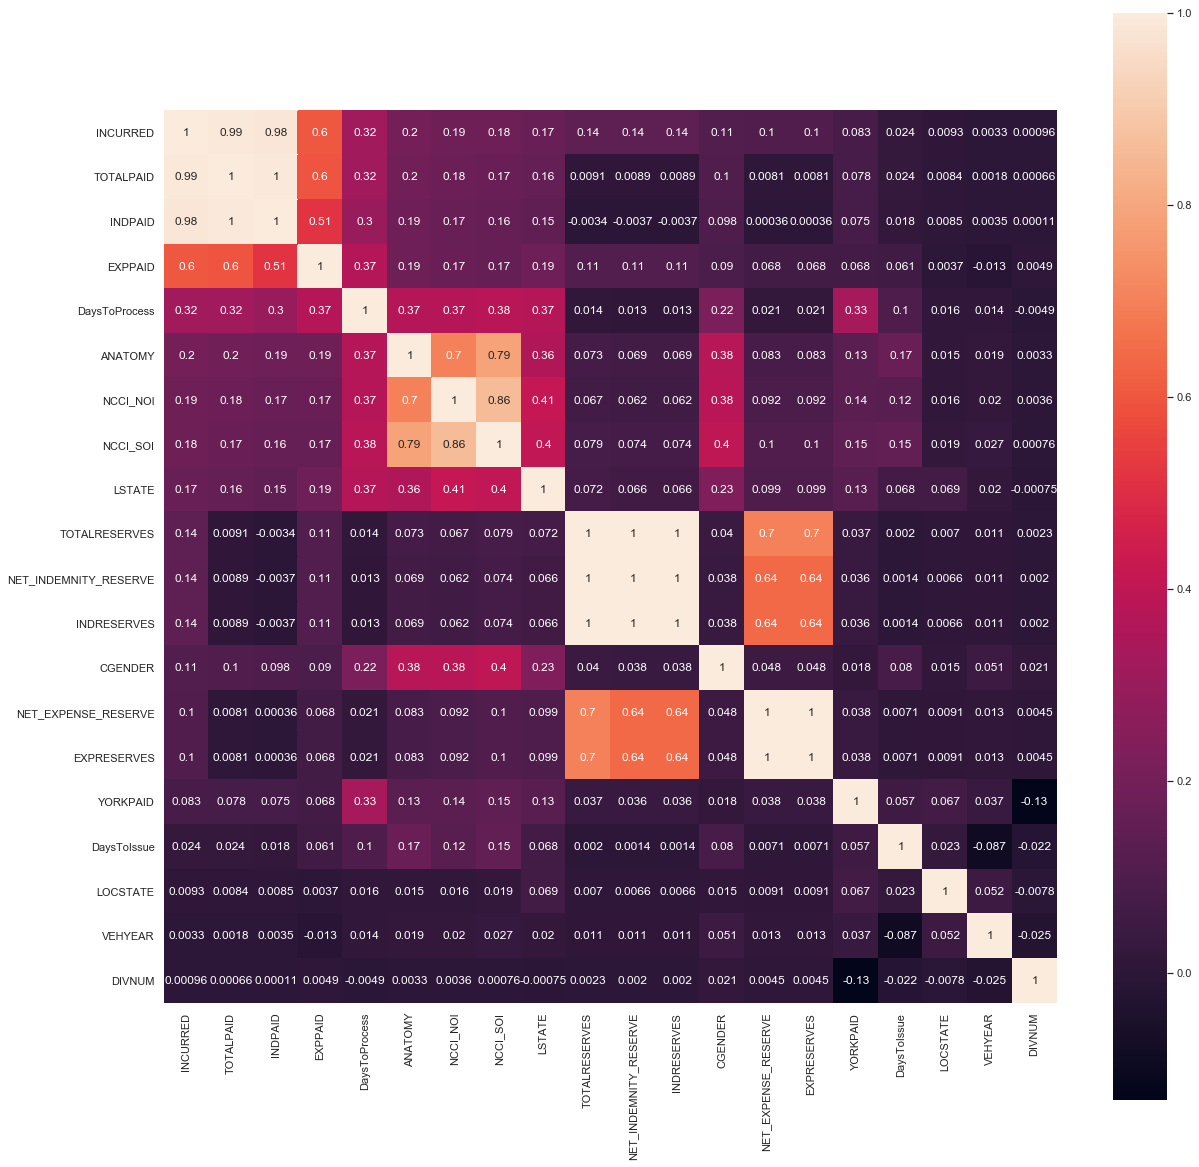

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_map = np.corrcoef(data2withoutTextcols[columns].values.T)
sns.set(font_scale=1.0)
a4_dims = (20, 20)
fig, ax = plt.subplots(figsize=a4_dims)
heatmap = sns.heatmap(correlation_map,ax=ax, cbar=True, annot=True, square=True, yticklabels=columns.values, xticklabels=columns.values)
#plt.figure(figsize=(12,6))
plt.show()

In [0]:
data.describe()

NET_INDEMNITY_RESERVE  NET_EXPENSE_RESERVE    STATUS   ANATOMY  \
count               2.74e+04             2.74e+04  27382.00  27382.00   
mean                1.36e+04             1.79e+03      0.08      3.19   
std                 5.31e+05             5.62e+04      0.49     12.15   
min                 0.00e+00             0.00e+00      0.00      0.00   
25%                 0.00e+00             0.00e+00      0.00      0.00   
50%                 0.00e+00             0.00e+00      0.00      0.00   
75%                 0.00e+00             0.00e+00      0.00      0.00   
max                 5.00e+07             4.79e+06      3.00     99.00   

        CGENDER  LOCSTATE    DIVNUM    LSTATE   DTAXID   DSTATE  \
count  27382.00  27382.00  27382.00  27382.00  27382.0  27382.0   
mean       0.32     24.10      0.30      0.87      0.0      0.0   
std        0.76     15.25      1.31      4.95      0.0      0.0   
min       -1.00     -1.00      0.00      0.00      0.0      0.0   
25%        0.00     10.00      0.00      0.00      0.0      0.0   
50%        0.00     23.00      0.00      0.00      0.0      0.0   
75%        0.00     36.00      0.00      0.00      0.0      0.0   
max        3.00     52.00     66.00     45.00      0.0      0.0   

           ...        TOTALRESERVES   INDPAID  MEDPAID   EXPPAID   YORKPAID  \
count      ...             2.74e+04  2.74e+04  27382.0  2.74e+04   27382.00   
mean       ...             1.54e+04  6.41e+05      0.0  5.54e+04   74492.55   
std        ...             5.69e+05  3.93e+06      0.0  4.76e+05   53608.66   
min        ...             0.00e+00  0.00e+00      0.0  0.00e+00       0.00   
25%        ...             0.00e+00  0.00e+00      0.0  0.00e+00   45674.00   
50%        ...             0.00e+00  1.87e+05      0.0  2.92e+03   73224.00   
75%        ...             0.00e+00  5.02e+05      0.0  2.50e+04   92500.00   
max        ...             5.16e+07  3.55e+08      0.0  2.52e+07  754062.00   

       TOTALPAID  RECOVERIES  INCURRED  DaysToIssue  DaysToProcess  
count   2.74e+04    2.74e+04  2.74e+04     27382.00       27382.00  
mean    6.96e+05   -2.22e+04  7.11e+05        44.70         112.91  
std     4.20e+06    1.45e+05  4.24e+06       105.99         189.44  
min     0.00e+00   -6.83e+06  0.00e+00       -21.00           0.00  
25%     9.50e+03    0.00e+00  9.50e+03         4.00          21.00  
50%     2.06e+05    0.00e+00  2.08e+05        10.00          52.00  
75%     5.36e+05    0.00e+00  5.41e+05        36.00         122.00  
max     3.55e+08    0.00e+00  3.55e+08      2468.00        3437.00  

[8 rows x 30 columns]

In [0]:
"""#If with normalisation uncomment this and the next cell
x = data2withoutTextcols
y = x['INCURRED'].values
x = x.drop('INCURRED', axis = 1)"""
x = data2withoutTextcols
cols = x.columns
indices = x.index
df = pd.DataFrame(x,columns=cols, index=indices)
y = x['INCURRED']
Y = pd.DataFrame(y,columns=['INCURRED'], index=indices)
x = x.drop('INCURRED', axis = 1)

In [0]:
"""
# Data Normalisation
from sklearn import preprocessing

cols = x.columns
indices = x.index

x = x.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
y = y.reshape(-1, 1)
Y = min_max_scaler.fit_transform(y)

df = pd.DataFrame(x_scaled,columns=cols, index=indices)
Y = pd.DataFrame(Y,columns=['INCURRED'], index=indices)"""

"\n# Data Normalisation\nfrom sklearn import preprocessing\n\ncols = x.columns\nindices = x.index\n\nx = x.values\nmin_max_scaler = preprocessing.MinMaxScaler()\nx_scaled = min_max_scaler.fit_transform(x)\ny = y.reshape(-1, 1)\nY = min_max_scaler.fit_transform(y)\n\ndf = pd.DataFrame(x_scaled,columns=cols, index=indices)\nY = pd.DataFrame(Y,columns=['INCURRED'], index=indices)"

In [0]:
df.isna().sum(axis=0)

NET_INDEMNITY_RESERVE        0
NET_EXPENSE_RESERVE          0
STATUS                       0
ANATOMY                      0
CSSNUM                   27382
CGENDER                      0
LOCSTATE                     0
DIVNUM                       0
LSTATE                       0
DTAXID                       0
DSTATE                       0
VEHYEAR                      0
DRIVERAGE                    2
EMPLSTATUS                   0
NCCI_NOI                     0
NCCI_SOI                     0
NCCI_SEV                     0
WEEKLYWAGE                   0
MARITAL                      0
INDRESERVES                  0
MEDRESERVES                  0
EXPRESERVES                  0
TOTALRESERVES                0
INDPAID                      0
MEDPAID                      0
EXPPAID                      0
YORKPAID                     0
TOTALPAID                    0
RECOVERIES                   0
INCURRED                     0
DaysToIssue                  0
DaysToProcess                0
dtype: i

In [0]:
df = df.dropna(axis=1,how="any")
df = df.dropna(axis=0,how="any")
df.reset_index(drop=True, inplace=True)
Y = Y.dropna(axis=0,how="any")
Y.reset_index(drop=True, inplace=True)

In [0]:
df = df.values

In [0]:
Y = Y.values

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split (df, Y, test_size = 0.20, random_state=42)

In [0]:
"""data.price = data.price.astype(int)
data.bathrooms = data.bathrooms.astype(int)
data.floors = data.floors.astype(int)
data.head(5)"""

'data.price = data.price.astype(int)\ndata.bathrooms = data.bathrooms.astype(int)\ndata.floors = data.floors.astype(int)\ndata.head(5)'

In [0]:
X_test

array([[      0,       0,       0, ..., 5515000,       1,     245],
       [      0,       0,       0, ...,   73878,      68,       3],
       [      0,       0,       0, ..., 2361033,     116,     249],
       ...,
       [      0,       0,       0, ..., 2980979,      10,     714],
       [      0,       0,       0, ...,       0,       9,      46],
       [      0,       0,       0, ..., 2035779,       1,      64]],
      dtype=int64)

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [0]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledGBM', Pipeline([('GBM', GradientBoostingRegressor())])))

In [0]:
import warnings
warnings.filterwarnings('ignore')
#warnings.filterwarnings(action='once')

In [0]:
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10, random_state=21)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: 1.000000 (0.000000)
ScaledLASSO: 1.000000 (0.000000)
ScaledEN: 1.000000 (0.000000)
ScaledKNN: 0.983835 (0.040296)
ScaledCART: 0.966365 (0.064251)
ScaledGBM: 0.977491 (0.039820)


In [0]:
import sklearn

In [0]:
from sklearn.model_selection import GridSearchCV

#scaler = StandardScaler().fit(X_train)
#rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=np.array([50,100,200,300,400]))
model = GradientBoostingRegressor(random_state=21)
kfold = KFold(n_splits=10, random_state=21)
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold)
grid_result = grid.fit(X_train, Y_train)

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

0.981803 (0.035024) with: {'n_estimators': 50}
0.981905 (0.034490) with: {'n_estimators': 100}
0.981923 (0.034484) with: {'n_estimators': 200}
0.981925 (0.034491) with: {'n_estimators': 300}
0.981930 (0.034489) with: {'n_estimators': 400}
Best: 0.981930 using {'n_estimators': 400}


In [0]:
from sklearn.metrics import mean_squared_error

#scaler = StandardScaler().fit(X_train)
#rescaled_X_train = scaler.transform(X_train)
model = GradientBoostingRegressor(random_state=21, n_estimators=50)
model.fit(X_train, Y_train)

# transform the validation dataset
#rescaled_X_test = scaler.transform(X_test)
predictions = model.predict(X_test)

print (mean_squared_error(Y_test,predictions))

6164870559580.685


In [0]:
def calc_mae(actual,pred):
    l = len(actual)
    #print(len(a),len(b))
    mae = 0
    count = 0
    for i in range(l):
        if(pred[i]!=0):
            diff = abs(actual[i] - pred[i])
            #square = diff * diff
            mae = mae + diff
            count += 1
    print(count)
    return(mae/l)

In [0]:
calc_mae(predictions,Y_test)

4394


array([52857.22232651])

In [0]:
print(len(predictions))

5477


In [0]:
z = []

In [0]:
for i in range(len(predictions)):
    z.append(Y_test[i][0])

In [0]:
z = np.array(z)

In [0]:
compare = pd.DataFrame({'Prediction': predictions, 'Test Data' : z})
compare.head(10)
#scaler.inverse_transform(scaled_data)

In [0]:
Y_test = z

In [0]:
Y_test = Y_test.reshape(-1, 1)
predictions = predictions.reshape(-1, 1)

In [0]:
"""actual_y_test = min_max_scaler.inverse_transform(Y_test)
actual_predicted = min_max_scaler.inverse_transform(predictions)
diff = abs(actual_y_test - actual_predicted)
print(len(actual_predicted))"""

In [0]:
print(mean_squared_error(actual_y_test,actual_predicted))

In [0]:
"""compare_actual = pd.DataFrame({'Test Data': actual_y_test, 'Predicted Price' : actual_predicted, 'Difference' : diff})
compare_actual = compare_actual.astype(int)
compare_actual.head(5)"""

In [0]:
data2['CGENDER']